In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [16]:
# 1) Load dataset
df = pd.read_csv("Mall_Customers.csv")

# 2) Drop null values (if any)
df = df.dropna()

# 3) Select only the features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# 4) Standardize features (important for K-Means since it uses Euclidean distances)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

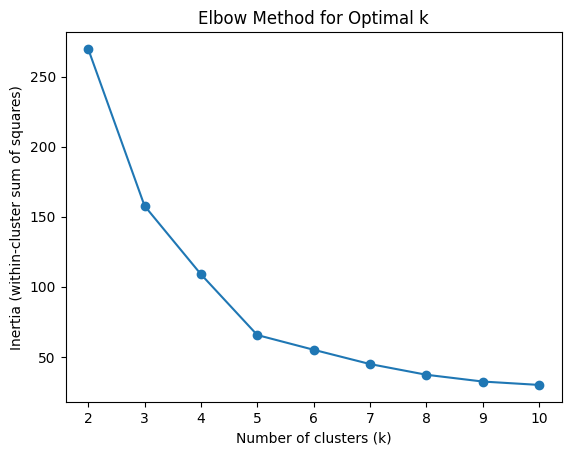

In [17]:
# 5) Elbow method to find optimal k
inertias = []
ks = range(2, 11)
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(ks, inertias, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.show()

In [18]:
# 6) Choose k (for this dataset usually 5 is a good choice)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

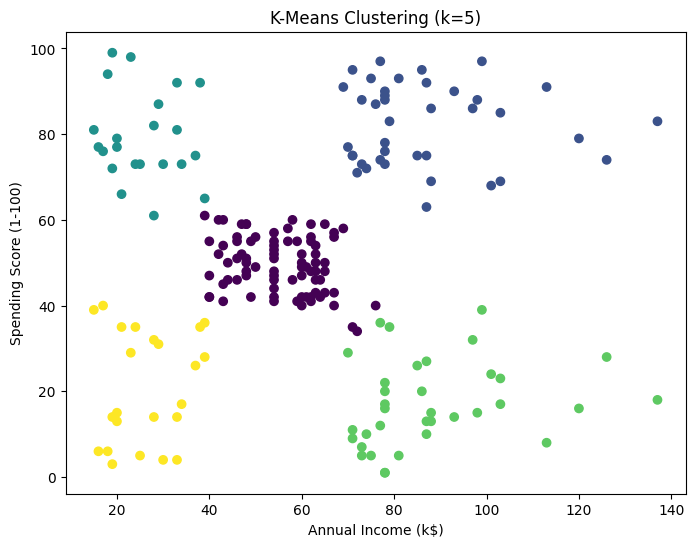

In [19]:
# 7) Plot 2D scatter plot with cluster colors
plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
            c=df["Cluster"], cmap="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.show()

In [20]:
# 8) Identify the "high potential" cluster (high income + high spending)
cluster_stats = df.groupby("Cluster").agg(
    Avg_Income=("Annual Income (k$)", "mean"),
    Avg_Spending=("Spending Score (1-100)", "mean")
)

# Define a "potential score" as the product of income * spending
cluster_stats["Potential_Score"] = cluster_stats["Avg_Income"] * cluster_stats["Avg_Spending"]

# Find the cluster with the highest potential
high_potential_cluster = cluster_stats["Potential_Score"].idxmax()

print("Cluster statistics:")
print(cluster_stats)
print(f"\n🚀 High potential cluster is: {high_potential_cluster}")

Cluster statistics:
         Avg_Income  Avg_Spending  Potential_Score
Cluster                                           
0         55.296296     49.518519      2738.190672
1         86.538462     82.128205      7107.248521
2         25.727273     79.363636      2041.809917
3         88.200000     17.114286      1509.480000
4         26.304348     20.913043       550.103970

🚀 High potential cluster is: 1
